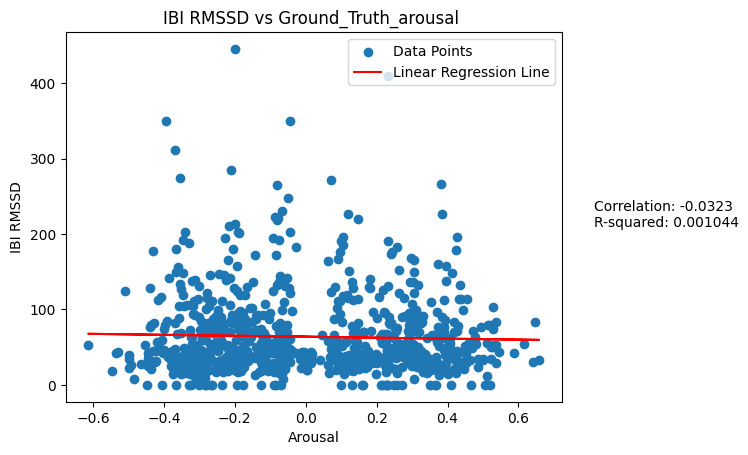

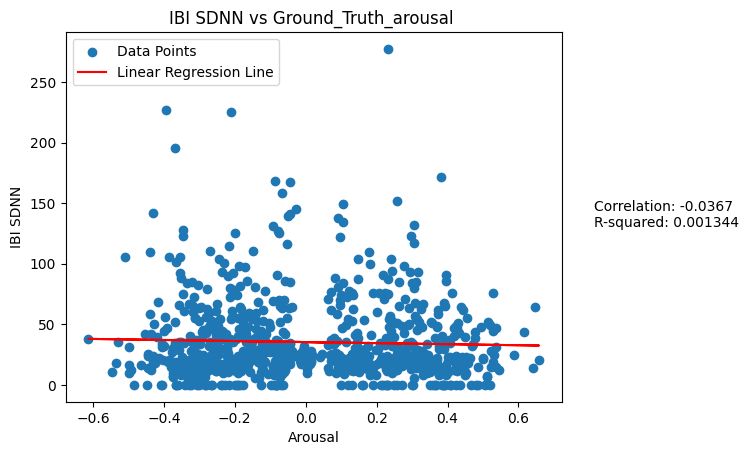

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Rmsd.csv'
df = pd.read_csv(file_path, low_memory=False)

# Strip leading and trailing spaces from column names
df.columns = df.columns.str.strip()

features = df.iloc[:, 4:]
correlation_r2_values = []

for feature_name, feature_values in features.items():
  X = pd.to_numeric(df['Arousal'])
  y = pd.to_numeric(feature_values)
  correlation_coefficient = X.corr(y)
  r_squared = correlation_coefficient**2

  regression_coefficients = np.polyfit(X, y, 1)
  regression_line = np.poly1d(regression_coefficients)

  plt.scatter(X, y, label='Data Points')
  plt.plot(X, regression_line(X), color='red', label='Linear Regression Line')

  plt.xlabel('Arousal')
  plt.ylabel(feature_name)
  plt.title(f'{feature_name} vs Ground_Truth_arousal ')
  plt.legend()
  correlation_text = f'Correlation: {correlation_coefficient:.4f}\nR-squared: {r_squared:.6f}'

  plt.text(0.95, 0.5, correlation_text, ha='left', va='center', color='black', fontsize=10, transform=plt.gcf().transFigure)
  correlation_r2_values.append({'Feature': f'{feature_name} vs Ground_Truth_Arousal', 'Correlation': correlation_coefficient, 'R-squared': r_squared})


  plt.show()